In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [4]:
df = pd.read_csv('Cyber_salries.csv')

In [6]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Security Officer,123400,USD,123400,US-VA,0,US,M
1,2022,SE,FT,Security Officer,88100,USD,88100,US-VA,0,US,M
2,2022,SE,FT,Security Engineer,163575,USD,163575,US-VA,100,US,M
3,2022,SE,FT,Security Engineer,115800,USD,115800,US-VA,100,US,M
4,2022,SE,FT,Security Analyst,136600,USD,136600,US-VA,100,US,M
5,2022,SE,FT,Security Analyst,109280,USD,109280,US-VA,100,US,M
6,2022,SE,FT,Security Engineer,211600,USD,211600,US-VA,100,US,M
7,2022,SE,FT,Security Engineer,182160,USD,182160,US-VA,100,US,M
8,2022,SE,FT,Security Engineer,211600,USD,211600,US-VA,100,US,M
9,2022,SE,FT,Security Engineer,182160,USD,182160,US-VA,100,US,M


Note that some of the variables got missing values indicated by 'NaN'. But this is not reliable and we need a summary statistics. Let's take a look at list of variables.

### Getting the info of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 11 columns):
work_year             940 non-null int64
experience_level      940 non-null object
employment_type       940 non-null object
job_title             940 non-null object
salary                940 non-null int64
salary_currency       940 non-null object
salary_in_usd         940 non-null int64
employee_residence    940 non-null object
remote_ratio          940 non-null int64
company_location      940 non-null object
company_size          940 non-null object
dtypes: int64(4), object(7)
memory usage: 80.9+ KB


## Checking if there are any Null Values in the dataset

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Getting the summary of the dataset

In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,940.000000,940.000000,940.000000,940.000000
mean,2021.441489,136130.007447,136185.139362,74.627660
std,0.690559,60735.965469,60792.691109,39.124738
min,2020.000000,30000.000000,30000.000000,0.000000
25%,2021.000000,95000.000000,95000.000000,50.000000
50%,2022.000000,130000.000000,130000.000000,100.000000
75%,2022.000000,165050.000000,165050.000000,100.000000
max,2022.000000,600000.000000,600000.000000,100.000000


### Graph representing the salary of each experienced employee in the regions of Virginia, Maryland and DC

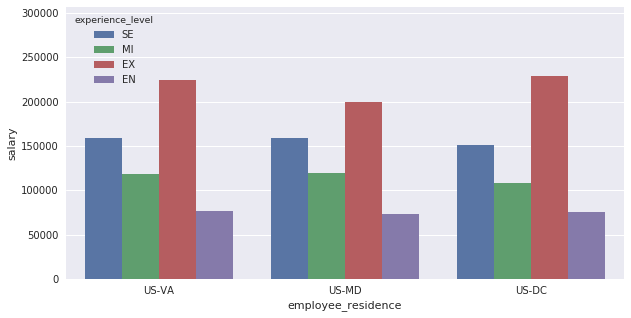

In [43]:

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot( x='employee_residence',y='salary',
                 hue='experience_level', data=df,
                 errwidth=0)
plt.show()

### Graph representing the salary of each cyberprofessional

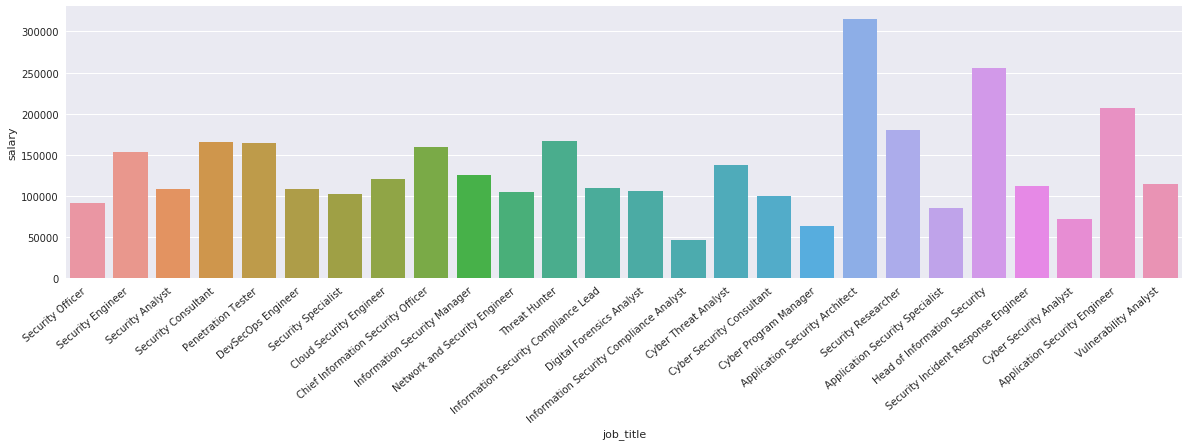

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot( x='job_title',y='salary',data=df[:100],errwidth=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

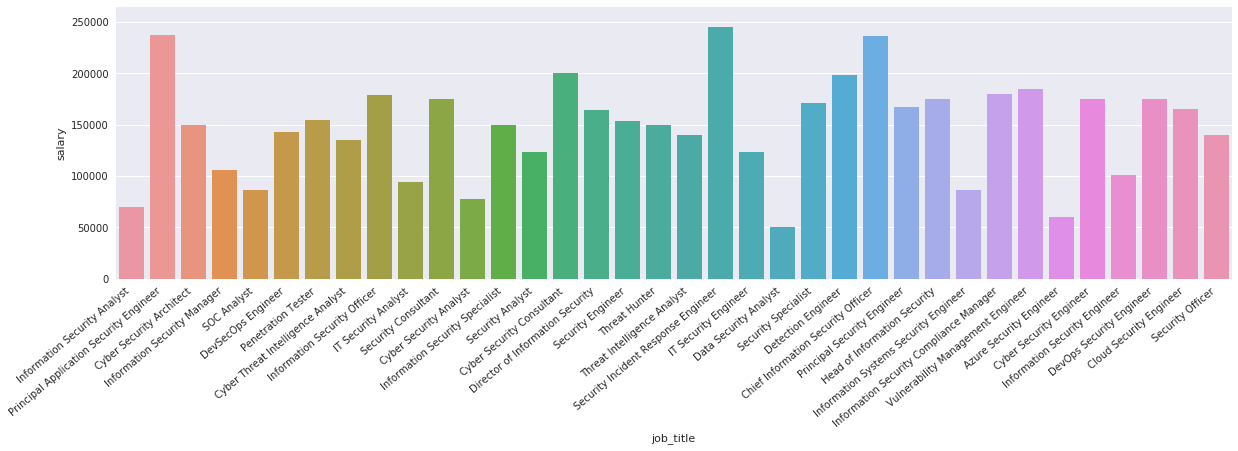

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot( x='job_title',y='salary',data=df[100:200],errwidth=0)
ax.set_xticklabels(ax.get_xticklabels(),  rotation=40, ha="right")
plt.show()

### TOP 10 Job_roles with the highest salaries

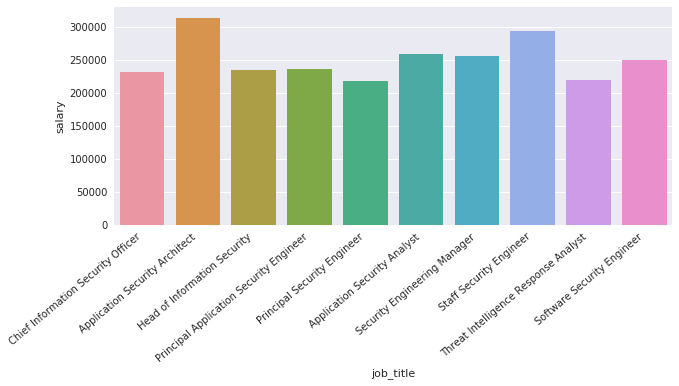

In [6]:
grouped = df.groupby('job_title')['salary'].mean()
top_10 = grouped.sort_values(ascending=False).head(10)
df_filtered = df[df['job_title'].isin(top_10.index)]

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x='job_title', y='salary', data=df_filtered, ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()